In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
path='ranking/finalv2/'
ass='final_cb_rating.csv'
meanpath='mean_std/mean_cbv3clustering.csv'

In [139]:
#function to scale the ratings from 0 to 100
def scaleranking(df, column_name):

    data=np.array(df[column_name].copy())
    # Calculate quartiles and IQR
    q1 = np.percentile(data, 27)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # Calculate whisker ranges
    low = np.min(data) if (len(data[data <= q1 - 1.5 * iqr])<1) else np.max(data[data <= q1 - 1.5 * iqr])
    up = np.min(data[data >= q3 + 1.5 * iqr])
    x_min=low
    x_max=up
    print(x_min,x_max)
    
    df['scaled_'+column_name]=((df[column_name] - x_min) * 100) / (x_max - x_min)
    return df

In [140]:
ranking=pd.read_csv(path+ass)

In [ ]:
pd.read_csv(meanpath)

In [ ]:
ranking

In [141]:
ranking=scaleranking(ranking, 'defensive')
ranking=scaleranking(ranking, 'offensive')
ranking=scaleranking(ranking, 'hybrid')
#ranking=scaleranking(ranking, '2nd runner')

-58.26685275627297 53.32843075099152
-68.26274222184693 65.85325564697702
-55.36652955637462 73.09424105467814


In [ ]:
ranking.sort_values(by='scaled_2nd runner', ascending=False)

In [102]:
ranking.to_csv('ranking_cbv2_scaled.csv', index=False)

In [50]:
for i in range(4):
    name='Res'+str(i)+'def'
    ranking=scaleranking(ranking, name)

-81.5902949707258 167.3425436799412
-61.70836513258556 284.5544723000032
-56.8410717670112 290.93174449749523
-56.26972451326676 377.5206847086522


In [103]:
ranking=pd.read_csv('ranking_cbv2_scaled.csv')

In [ ]:
ranking

In [142]:
index0=np.array(ranking['scaled_defensive'])
index1=np.array(ranking['scaled_offensive'])
index2=np.array(ranking['scaled_hybrid'])
#index3=np.array(ranking['scaled_def_playmaker'])

In [52]:
ranking['def_playmaker']=index3
ranking.to_csv('ranking_mi_dpl.csv')

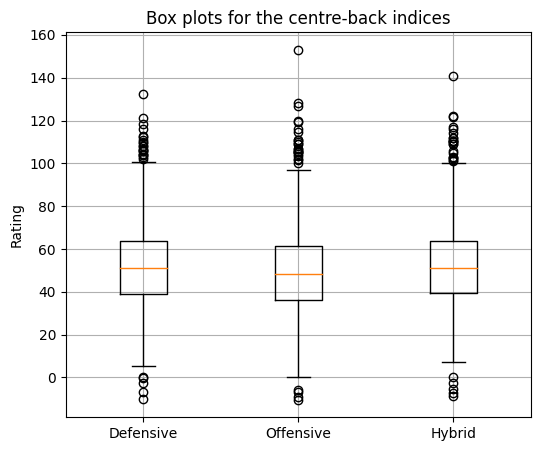

In [144]:
vector1 = index0
vector2 = index1
vector3 = index2
#vector4 = index3
figurename='cbbox.png'

# Create a list of the vectors
vectors = [vector1, vector2, vector3]

# Create a boxplot for each vector side by side
plt.figure(figsize=(6, 5))
plt.boxplot(vectors, labels=['Defensive', 'Offensive', 'Hybrid'])
plt.title('Box plots for the centre-back indices')
plt.ylabel('Rating')
plt.grid(True)
plt.savefig(figurename)
plt.show()

In [ ]:
vector1 = index0
vector2 = index1
figurename='defenderbox.png'

# Create a list of the vectors
vectors = [vector1, vector2]

# Create a boxplot for each vector side by side
plt.figure(figsize=(6, 5))
plt.boxplot(vectors, labels=['Defensive', 'Offensive'])
plt.title('Box plots for the centre-back indices')
plt.ylabel('Rating')
plt.grid(True)
plt.savefig(figurename)
plt.show()

In [ ]:
ranking=ranking.sort_values(by='scaled_Res1def', ascending=False)